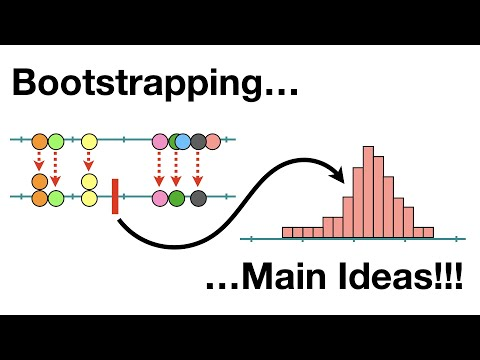

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# 1. Standard Deviation is the measure of how spread out the data in your data set is from the mean. It shows the deviation of the data from the mean of the data. The standard error of the mean is different because it tells you how much the average of your data may change/vary if you were to receive more data/samples. It is the measure of variability in the samples' mean if you were to keep sampling from your actual samples and repeatedly calculate the mean. A good way that describe it is "the standard deviation of the distribution of sample means."


# 2. If we want to create a confidence interval with the Standard error of the mean, we first need to calculate the sample mean from our data. After that, we need to find the SEM of that data. The next step is to multiply our SEM by 1.96, which is the value from the normal distribution for 95% confidence interval. Once we have multiplied, we take this new value, add and subtract it from our sample mean to both the lower and the upper bounds of our confidence interval.

# 3. In order to do this, we want to generate many bootstrapped samples from our original dataset. Like stated in the video, each bootstrapped sample will contain the same amount of individual data points. Next, we want to calculate all of the means of our bootstrapped data sets, this will create a distribution of bootstrapped means. Next we want to implement the np.quantile() function to find the 2.5th and the 97.5th percentile of all our bootstrapped means. We choose the 2.5th and 97.5th because they represent the lower and upper bounds of the 95th bootstrapped confidence level.

# lower_bound = np.quantile(bootstrapped_means, 0.025)
# upper_bound = np.quantile(bootstrapped_means, 0.975)

# This is how it should look. Doing this ensures that 95% of the bootstrapped means will be covered in the interval.

# This works because bootstrapping allows us to directly create the distributions of possible sample means and then pick the middle 95% of them. It gives us a very accurate data interval.

# 4 The following code is code created by ChatGPT for 95% bootstrap confidence interval for the mean

In [16]:
import numpy as np

# Step 1: This code creates a random sample
sample = np.random.randint(10, 100, size=50)  # This is a random sample of 50 numbers, ranging between 10 and 100

# Step 2: Here, we set the number of bootstrap samples
n_bootstrap_samples = 1000  # 1000 is the number of random samples that chatgpt picked

# Step 3: Now we are creating an empty list to store the sample means
bootstrap_means = []

# Step 4: Here we are creating our bootstrap samples and then caclulating the mean
for _ in range(n_bootstrap_samples):
    # This is resampling the data with a replacement to create the boostrapped data
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Now we are calculating the mean of our bootstrapped data samples
    bootstrap_means.append(np.mean(bootstrap_sample))

# Step 5: Like stated before, this is calculating the 95% confidence interval.
lower_bound = np.quantile(bootstrap_means, 0.025)
upper_bound = np.quantile(bootstrap_means, 0.975)

# Print the results
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound}, {upper_bound}]")


95% Bootstrap Confidence Interval for the Mean: [44.756499999999996, 59.7215]


# ChatGPTs new response for how to adapt the code for a different statistic (median)

In [19]:
# Step 4 (Modified): We are going to create bootstrapped samples and calculate MEDIAN
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Here we are calculating the median 
    bootstrap_means.append(np.median(bootstrap_sample))  # instead of np.mean, we use np.median

# Step 5: Here no change is required in the code, we are simply calculating the 95% confidence interval for the median.
lower_bound = np.quantile(bootstrap_means, 0.025)
upper_bound = np.quantile(bootstrap_means, 0.975)

# Print the results
print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound}, {upper_bound}]")


95% Bootstrap Confidence Interval for the Median: [38.0, 65.0]


# Summary of Today's Discussion

1. **Standard Error of the Mean vs. Standard Deviation**:
   - **Standard Deviation**: Measures how spread out the data is from the mean.
   - **Standard Error of the Mean (SEM)**: Indicates how much the sample mean may vary if additional samples were taken. It's essentially the standard deviation of the distribution of sample means.

2. **Creating a 95% Confidence Interval Using SEM**:
   - To create a 95% confidence interval, first calculate the sample mean from the data. Then, find the SEM, multiply it by 1.96 (for 95% confidence), and add/subtract this value from the sample mean to get the interval.

3. **Creating a 95% Bootstrapped Confidence Interval**:
   - Generate multiple bootstrapped samples from the original dataset (same size as the original). Calculate the means of these samples to create a distribution of bootstrapped means.
   - Use the `np.quantile()` function to find the 2.5th and 97.5th percentiles, which represent the bounds of the 95% bootstrapped confidence interval.

4. **Bootstrapping for Different Statistics**:
   - The assignment involves creating code to compute a 95% bootstrapped confidence interval for a population mean and commenting on the code to show how to adapt it for other statistics (like the median).

5. **Next Steps**:
   - Write and understand the code for bootstrapping and confidence intervals, ensuring that you can modify it to apply to different statistical measures.

https://chatgpt.com/share/66fe042e-0600-8012-a0db-744210b3a081

# 5. Population Parameter: A numerical value assigned for describing the characteristics of a population, for example, population mean or median. Population parameters are fixed values that are usually unknown due to requiring data from the entire population to calculate

# Sample Statistics: A numerical value that describes the characteristic of a sample taken from the population, this can be the sample mean or median. Sample statistics are what is used to create a population parameter.

# Difference between the two

# Estimation: Sample statistics are what is used to estimate a population parameter. These estimations can be made more accurate using the 95th% confidence interval. Making these estimations more accurate is important because well, they are estimations of value that is usually unknown! 

# Variability: When we take different samples from a population, there is a massive amount of different values we can get for a certain statistic, these samples from the population can vary very slightly or can vary a lot. This is why we need confidence intervals since they provide a range for what the true value can be.

# 6. What is bootstrapping?

# Bootstrapping is when you have an original value set, and you make a bunch of other data sets using the original. How this works is by randomly selecting the same amount of data points from the original, except you can randomly select the same datapoint multiple times, causing variations. We can do this with whatever statistic from the original dataset were looking for. With our new bootstrapped data sets, we can create a new data set based on the statistics we are analying. This allows us to see the range of that statistic.

# What is the main purpose of bootstrapping?

# We use bootstrapping to see the variability or uncertainty there can be in our sample statistics. Sometimes we cant measure everything in a population, so bootstrapping lets us use as many different smaller samples to make estimations or inferences about the original.

# If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

# If we had a sample of size n from the original population, what we would do is create many different bootstrapped data sets from our sample of size n. From there, we have a bunch of different bootstrapped datasets, hopefully emulating what the data may be for the whole sample. We now have a range for the specific statistic we were interested in and can see if our original guess about that statistic is plausible.

# 7. When a confidence interval overlaps with zero, it means that zero is a possible value for the true population parameter. In relation to the medicine, it means that the medicine may have no effect at all, and that any possible "effects" were due to coincidence. So we fail to reject the null hypothesis because there is not enough evidence gathered that would conclude the medicine does have an effect. 

# 8. Vaccine Data Analysis Assignment

# Problem Introduction

# We are analyzing the effectiveness of a vaccine developed by a company. We have been given patient data that we will use determine whether or not the vaccine has any real effect.

# Null Hypothesis of "No Effect"

# In this context of the vaccine and the patient data, the null hypothesis would be that the vaccine does not have any effect on patients after being administered. To reject the null hypothesis, we must find data that concludes this vaccine does have an effect.

# Data Visualization

In [9]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Define the data as a dictionary
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('vaccine_data.csv', index=False)

print("CSV file 'vaccine_data.csv' created successfully.")


CSV file 'vaccine_data.csv' created successfully.


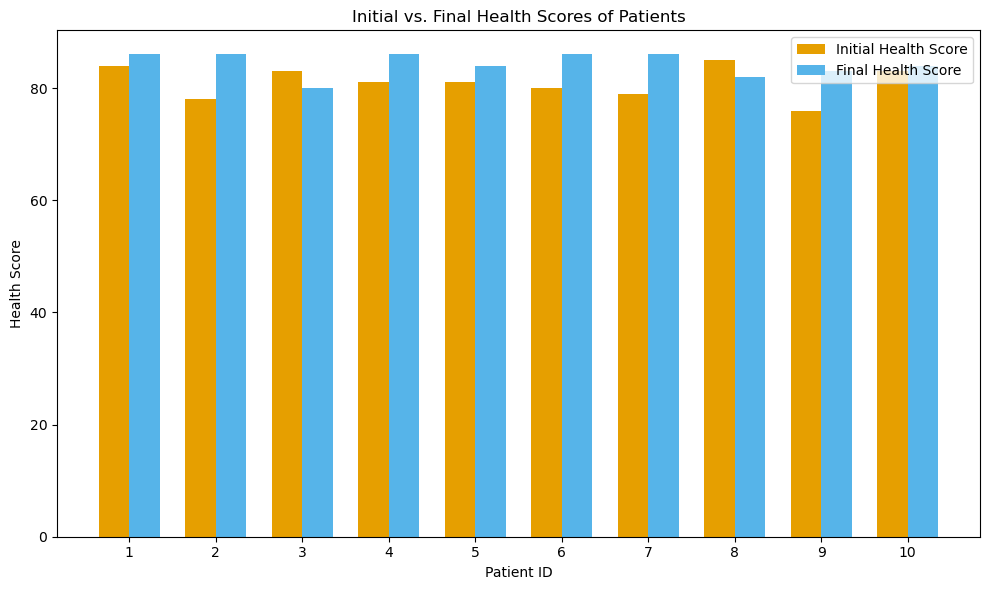

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('vaccine_data.csv')

# Set the figure size
plt.figure(figsize=(10, 6))

# Define color-blind-friendly colors
colors = ['#E69F00', '#56B4E9']  # Orange and Light Blue

# Create a bar plot
bar_width = 0.35
index = range(len(data))

# Create bars for initial and final health scores
plt.bar(index, data['InitialHealthScore'], bar_width, label='Initial Health Score', color=colors[0])
plt.bar([i + bar_width for i in index], data['FinalHealthScore'], bar_width, label='Final Health Score', color=colors[1])

# Add labels and title
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs. Final Health Scores of Patients')
plt.xticks([i + bar_width / 2 for i in index], data['PatientID'])  # Center x-ticks between the bars
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


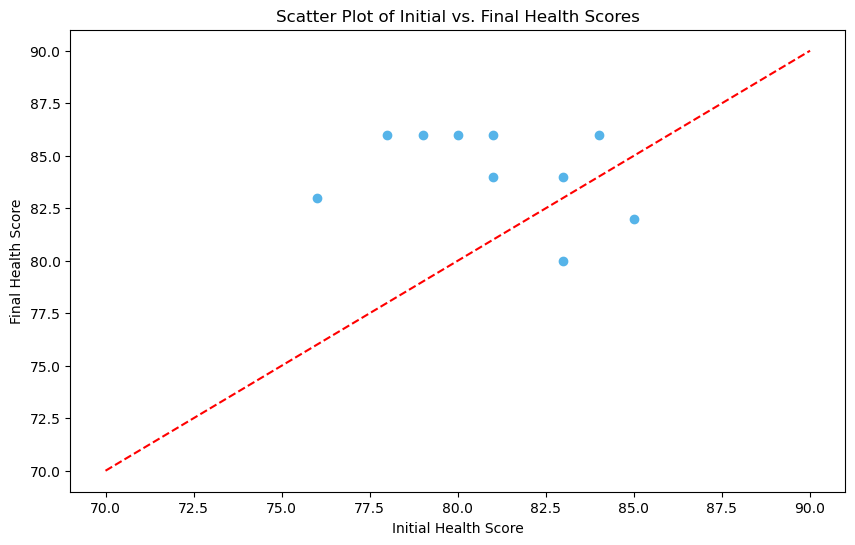

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(data['InitialHealthScore'], data['FinalHealthScore'], color='#56B4E9')
plt.title('Scatter Plot of Initial vs. Final Health Scores')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.plot([70, 90], [70, 90], color='red', linestyle='--')  # 45-degree reference line
plt.show()


# Analyzing the Visualization

# We are already off to a good start with proving this vaccine does have an effect. As we can see in the scatterplot and the bar graph created. There are only two occurrences of the patient experiencing a worse health score after being administered the vaccine. Out of 10 patients, 2 have worse scores. We can say with our sample that the vaccine has an 80% success rate. 

In [24]:
import numpy as np

# Summary statistics
initial_mean = data['InitialHealthScore'].mean()
final_mean = data['FinalHealthScore'].mean()
initial_std = data['InitialHealthScore'].std()
final_std = data['FinalHealthScore'].std()

print(f'Initial Mean: {initial_mean}, Initial Std: {initial_std}')
print(f'Final Mean: {final_mean}, Final Std: {final_std}')

# Bootstrapping
n_iterations = 1000
bootstrap_diffs = []
np.random.seed(42)  # For reproducibility

for _ in range(n_iterations):
    sample_initial = np.random.choice(data['InitialHealthScore'], size=len(data), replace=True)
    sample_final = np.random.choice(data['FinalHealthScore'], size=len(data), replace=True)
    bootstrap_diff = sample_final.mean() - sample_initial.mean()
    bootstrap_diffs.append(bootstrap_diff)

# Confidence intervals
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)

print(f'Bootstrapped Confidence Interval for the Mean Difference: ({ci_lower}, {ci_upper})')


Initial Mean: 81.0, Initial Std: 2.8284271247461903
Final Mean: 84.3, Final Std: 2.110818693198342
Bootstrapped Confidence Interval for the Mean Difference: (1.2974999999999974, 5.400000000000006)


# Boostrapped Confidence Interval For Mean Difference

# After creating bootstrapped samples, we now have a confidence interval for the mean difference of health points gained after taking the vaccine. The mean difference is : 1.297, 5.400 points. What we can conclude is that with 95% confidence, the vaccine is effective is helping the patient.

# Findings And Discussion:

# Health Improvement: The initial mean for health score was 81.0, and the final mean was 84.3, we can conclude that on average, the health scores of patients improved. after being administered the vaccine.

# Null Hypothesis: Since our confidence interval for the mean difference was 1.297, 5.400 points, which doesn't include zero, we have enough evidence to reject the null hypothesis based on the improvements from our patients.

# Conclusion: After creating bootstrapped samples, analyzing the original data, and analyzing the bootstrapped samples, there is enough evidence to conclude that the vaccine is working, and does help improve health scores.

# Further Considerations: It would be great to have a larger sample. Since this is a small sample, its still possible that the vaccine doesnt work, and any improvements were due to coincidence.

# Summary of Our Discussion from Question 5 Onward

## 1. Question 5: Population Parameter vs. Sample Statistic  
- **Population Parameter**: Fixed, unknown numerical value (e.g., mean, median) that describes a population's characteristics.  
- **Sample Statistic**: Value derived from a sample (e.g., sample mean, median) used to estimate the population parameter.  
- **Key Points**:  
  - Sample statistics help estimate population parameters, often using confidence intervals for accuracy.  
  - Variability occurs when different samples yield different statistics, which is why confidence intervals are essential to provide a range for true values.

## 2. Question 6: Bootstrapping  
- **Process**: Generate multiple datasets by randomly sampling with replacement from the original dataset, allowing for repeated selections of the same data points.  
- **Purpose**: To assess the variability or uncertainty of sample statistics when the entire population cannot be measured.  
- **Application**: If you have a hypothesized average, bootstrapping creates various datasets to see if your guess aligns with the observed statistics from resampling.

## 3. Question 7: Confidence Interval and Null Hypothesis  
- When a confidence interval overlaps with zero, it indicates that zero is a plausible value for the true population parameter, suggesting the treatment (e.g., vaccine) may have no effect.  
- Failing to reject the null hypothesis means there isn’t sufficient evidence to conclude that the treatment has an effect.  
- Conversely, if the confidence interval does not include zero, it suggests rejecting the null hypothesis, indicating a likely effect of the treatment.

## 4. Vaccine Data Analysis Assignment  
- **Data**: Provided health scores before and after vaccination for analysis.  
- **Visualization**: Created visualizations (boxplots and histograms) to compare initial and final health scores effectively.  
- **Quantitative Analysis**: Conducted summary statistics and bootstrapping to analyze the effectiveness of the vaccine.  
- **Findings**:  
  - Initial mean health score: 81.0  
  - Final mean health score: 84.3  
  - Bootstrapped confidence interval for mean difference: (1.30, 5.40)  
- **Conclusion**: The vaccine is effective, as the confidence interval does not include zero, allowing for the rejection of the null hypothesis of "no effect."

## 5. Next Steps  
- Discussed the importance of analyzing and interpreting the results, emphasizing clarity in documenting findings, and considering further visualizations for enhanced presentation.

https://chatgpt.com/share/66fe042e-0600-8012-a0db-744210b3a081